In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

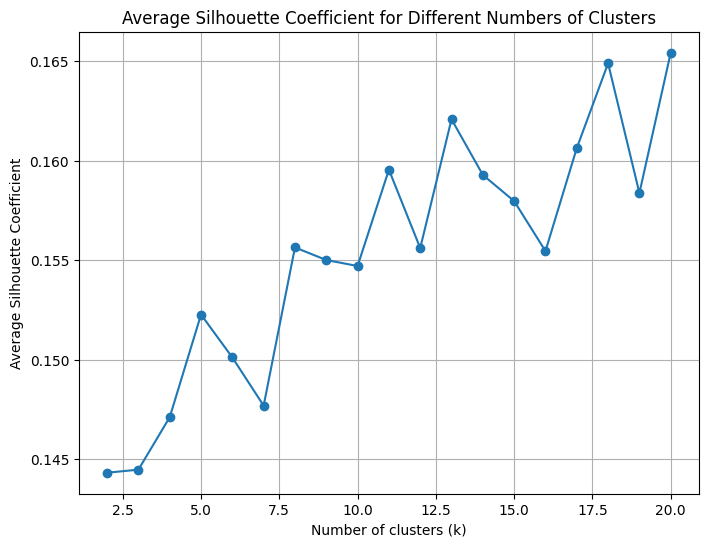

The best k value is: 20 with an average Silhouette coefficient of 0.16543563726624314.


In [62]:

data = pd.read_csv("google_review_ratings.csv")

data.dropna(inplace=True)

numerical_data = data.select_dtypes(include=[np.number])

k_values = range(2, 21)

avg_silhouette_scores = []

for k in k_values:
    silhouette_scores = []
    if len(set(numerical_data)) > k:
        for _ in range(5):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(numerical_data)
            labels = kmeans.labels_
            silhouette_avg = silhouette_score(numerical_data, labels)
            silhouette_scores.append(silhouette_avg)
        avg_silhouette = np.mean(silhouette_scores)
        avg_silhouette_scores.append(avg_silhouette)

        avg_silhouette_scores.append(np.nan)

# Plotting the average Silhouette coefficients for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, avg_silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Coefficient')
plt.title('Average Silhouette Coefficient for Different Numbers of Clusters')
plt.grid(True)
plt.show()


best_k = np.nanargmax(avg_silhouette_scores) + 2
best_avg_silhouette = max(avg_silhouette_scores)

print(f"The best k value is: {best_k} with an average Silhouette coefficient of {best_avg_silhouette}.")


In [63]:

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(numerical_data)

centroids = kmeans.cluster_centers_
print(f"Centroids of the clusters:\n{centroids}")


Centroids of the clusters:
[[1.2337395  3.67197479 2.39235294 2.12457983 2.45932773 3.47004202
  4.58596639 3.41848739 3.96932773 2.85386555 2.49840336 2.13726891
  2.10478992 4.31239496 0.93315126 0.73945378 0.73558824 0.72806723
  0.72142857 0.93105042 0.74285714 0.75331933 0.78836134 1.08806723]
 [2.29323944 2.11394366 1.78450704 1.51521127 1.39943662 1.34704225
  1.35760563 1.2771831  1.51859155 1.21507042 0.99197183 0.9715493
  2.13323944 4.21633803 1.48014085 1.5871831  1.69873239 1.77943662
  3.96788732 4.08901408 3.01873239 3.61126761 2.6615493  2.58605634]
 [2.015875   2.31641667 2.12575    2.17983333 2.095      1.95429167
  2.19391667 1.77841667 1.848375   1.76208333 1.77054167 1.80854167
  1.90120833 2.30333333 2.28154167 1.73504167 2.769      3.21383333
  3.82925    1.41566667 1.39591667 1.958125   2.04208333 2.28529167]
 [1.26262206 1.51428571 1.64068716 2.18976492 2.25520796 2.38858951
  3.45372514 3.59994575 4.45155515 4.44971067 4.96779385 2.17117541
  1.72877034 1.3216

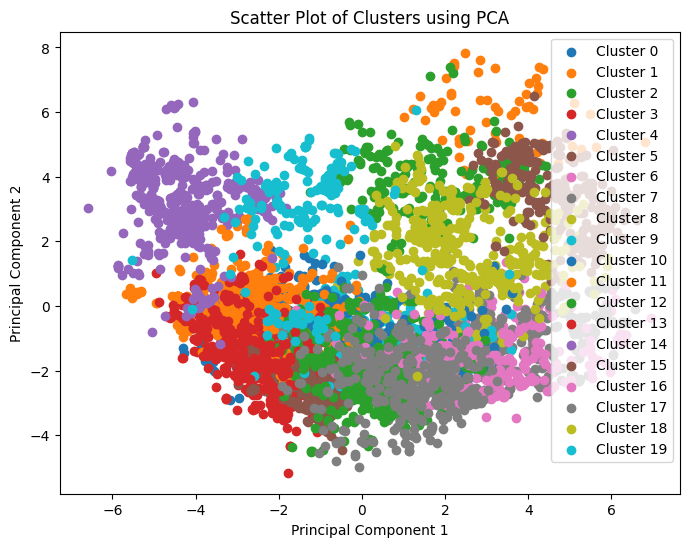

In [64]:

pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(numerical_data)

cluster_labels = kmeans.labels_


plt.figure(figsize=(8, 6))
for cluster in range(best_k):
    plt.scatter(pca_result[cluster_labels == cluster, 0], pca_result[cluster_labels == cluster, 1], label=f'Cluster {cluster}')

plt.title('Scatter Plot of Clusters using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Are the found clusters well separated in the
visualization?

Is that observation consistent with the computed Silhouette coefficient?   

No they are not well seperated

according to the given plot and what I observed both of them are close to each other

In [ ]:


data = pd.read_csv("google_review_ratings.csv")

data.dropna(inplace=True)

numerical_data = data.select_dtypes(include=[np.number])


k_values = range(2, 21)

avg_silhouette_scores_kmeans = []
avg_silhouette_scores_gmm = []
avg_silhouette_scores_spectral = []

for k in k_values:
    silhouette_scores_kmeans = []
    silhouette_scores_gmm = []
    silhouette_scores_spectral = []

    for _ in range(5):
        # K-Means
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(numerical_data)
        labels_kmeans = kmeans.labels_
        silhouette_kmeans = silhouette_score(numerical_data, labels_kmeans)
        silhouette_scores_kmeans.append(silhouette_kmeans)

        # Gaussian Mixture Model (GMM)
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(numerical_data)
        labels_gmm = gmm.predict(numerical_data)
        silhouette_gmm = silhouette_score(numerical_data, labels_gmm)
        silhouette_scores_gmm.append(silhouette_gmm)

        # Spectral Clustering
        spectral = SpectralClustering(n_clusters=k, random_state=42)
        labels_spectral = spectral.fit_predict(numerical_data)
        silhouette_spectral = silhouette_score(numerical_data, labels_spectral)
        silhouette_scores_spectral.append(silhouette_spectral)


    avg_silhouette_kmeans = np.mean(silhouette_scores_kmeans)
    avg_silhouette_gmm = np.mean(silhouette_scores_gmm)
    avg_silhouette_spectral = np.mean(silhouette_scores_spectral)

    avg_silhouette_scores_kmeans.append(avg_silhouette_kmeans)
    avg_silhouette_scores_gmm.append(avg_silhouette_gmm)
    avg_silhouette_scores_spectral.append(avg_silhouette_spectral)

plt.figure(figsize=(8, 6))
plt.plot(k_values, avg_silhouette_scores_kmeans, marker='o', label='K-Means')
plt.plot(k_values, avg_silhouette_scores_gmm, marker='o', label='Gaussian Mixture Model')
plt.plot(k_values, avg_silhouette_scores_spectral, marker='o', label='Spectral Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Coefficient')
plt.title('Average Silhouette Coefficients for Different Numbers of Clusters (K)')
plt.legend()
plt.grid(True)
plt.show()

max_avg_silhouette = max(max(avg_silhouette_scores_kmeans), max(avg_silhouette_scores_gmm), max(avg_silhouette_scores_spectral))

if max_avg_silhouette in avg_silhouette_scores_kmeans:
    best_method = 'K-Means'
elif max_avg_silhouette in avg_silhouette_scores_gmm:
    best_method = 'Gaussian Mixture Model'
    best_method = 'Spectral Clustering'

print(f"The method with the highest average Silhouette coefficient is: {best_method}.")



In [ ]:

n = 3
m = 2

# Remove first n rows and m columns
trimmed_data = data.iloc[n:, m:]


trimmed_data.fillna(trimmed_data.mean(), inplace=True)
scaler = StandardScaler()
X = scaler.fit_transform(trimmed_data)


eps_values = [0.3, 0.5, 0.7, 1.0]

for eps in eps_values:

    dbscan = DBSCAN(eps=eps, min_samples=5)


    dbscan.fit(X)


    cluster_labels = dbscan.labels_

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Silhouette Score (eps={eps}): {silhouette_avg}")


Silhouette Score (eps=0.3): -0.38043140309511
Silhouette Score (eps=0.5): -0.3188173748606123
Silhouette Score (eps=0.7): -0.20956126244367884
Silhouette Score (eps=1.0): -0.07077867584742926
